# Titanic Data Analysis By Mehdi Jafari

## Introduction

This project is analyzing the demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Here are the variables that I will look at:  
1- Socioeconomic status  
2- Being alone or with family   

I will try to answer the following questions:   

1- Did people's socioeconomic status help them to get into lifeboat?  
2- How did being with family affect their chance for survival?  
3- What is to co-relation between age and number of family members?  


In [9]:
%matplotlib inline 
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

titanic_df = pd.read_csv('titanic-data.csv')
titanic_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Data Wrangling

Since count in the column 'Age' is different from other columns, there must be some rows in our dataset with invalid or null age which should be scraped from the dataset that will be used for the rest of this project.


In [10]:
titanic_df = titanic_df[titanic_df.Age > 0]


In [11]:

#lambda function for survival conversion 
SurvivalConversion = lambda survived: 'SURVIVED' if survived == 1 else 'DIED'

#lambda function to return 'With Family' if thet are traveling with their siblings, parents, partners or children 
WithFamilyConversion = lambda sibsp , parch: 'Alone'  if sibsp == 0 and parch == 0 else 'With Family'

#returns the survival rate based on the input coulmns
def GetsurvivalRate(coulmns):
    return titanic_df.groupby(coulmns).mean().loc[:,'SURVIVED']

#add a variable to the dataset by appling a function 
def addVariable(newColumnName, columnName, function):
    titanic_df[newColumnName] =titanic_df[columnName].apply(function)
    
#function to convert pClass value based on the documentation
def ConvertPClass(pclass):
    if pclass == 1:
        return 'Upper'
    elif pclass == 2:
        return 'Middle'
    elif pclass == 3:
        return 'Lower'
    else:
        return 'NA'

#returns number of family members on the board
def FamilyCount(sibsp, parch):
    return sibsp + parch

#adding comuted columns
addVariable('SurvivedFactor', 'Survived', SurvivalConversion)
addVariable('PclassFactor', 'Pclass', ConvertPClass)

titanic_df['WithFamily'] =  titanic_df.apply(lambda row: WithFamilyConversion(row['SibSp'], row['Parch']), axis=1)
titanic_df['FamilyCount'] = titanic_df.apply(lambda row: FamilyCount(row['SibSp'], row['Parch']), axis=1)

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked SurvivedFactor  \
0      0         A/5 21171   7.2500   NaN        S           DIED   
1      0          PC 17599  71.2833   C85        C       SURVIVED   
2      0  STON/O2. 3101282   7.9250   NaN        S       SURVIVED   
3      0            113803  53.1000  C123        S       SURVIVED   
4      0            373450   8.0500   NaN        S           DIED   

  PclassFactor   WithFamily  FamilyCount  
0        Lower  With Family            1  
1        Upper  With Family            1  
2        Lower        Alone            0  
3        Upper  With Family            1  
4        Lower        Alone            0

## Exploration Phase


### Selected Variables Distribution

Let's start with exploring the destitution of our selected variables:


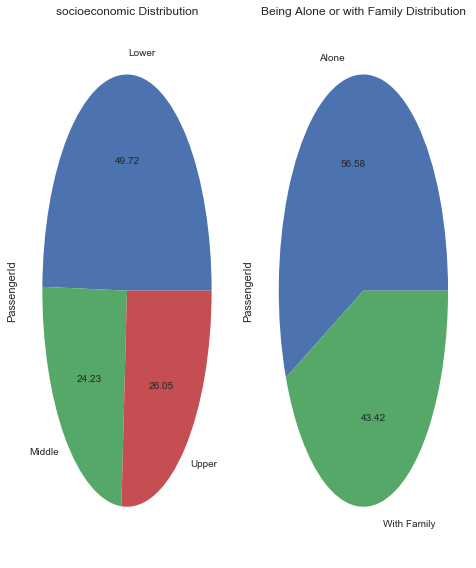

In [12]:
SocioEconomicDistribution = pd.Series(titanic_df.groupby(['PclassFactor']).count()['PassengerId'])
WithFamilyDistribution = pd.Series(titanic_df.groupby(['WithFamily']).count()['PassengerId'])

plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((1, 36), (0, 0), colspan=12)
ax2 = plt.subplot2grid((1, 36), (0, 12), colspan=12)


SocioEconomicDistribution.plot.pie(figsize=(10, 8),autopct='%.2f', title="socioeconomic Distribution", ax=ax1)
WithFamilyDistribution.plot.pie(figsize=(10, 8),autopct='%.2f', title="Being Alone or with Family Distribution", ax=ax2)

plt.tight_layout()

### 1- Did people's socioeconomic status help them to get into lifeboat?
As dipected in the follwing diagram, there could be a corelation between socio-economic status and the survival. About 70 percent of Upper class travelers survicved where as only 25 percent of lower class survived.


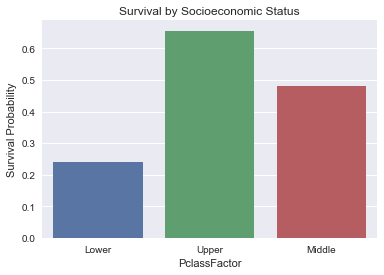

In [13]:
sns.barplot(x="PclassFactor", y="Survived", data=titanic_df,ci=None) 
plt.title('Survival by Socioeconomic Status')
plt.ylabel('Survival Probability') 
plt.show()

### 2- How did being with family affect their chance for survival?
 As we can see in the diagram and percisely in the printed values they would have better chance to survice if they were travling with family. 

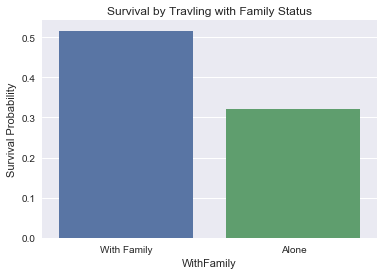

In [15]:
sns.barplot(x="WithFamily", y="Survived", data=titanic_df,ci=None) 
plt.title('Survival by Travling with Family Status')
plt.ylabel('Survival Probability') 
plt.show()

### 3- What is to co-relation between age and number of family members?

As we can see in the following report, the calculated Pearson correlation coefficient value is 0.301913959192 which means there is not a strong correlation between age and the number of family members on the RMS titanic.

-0.301913959192


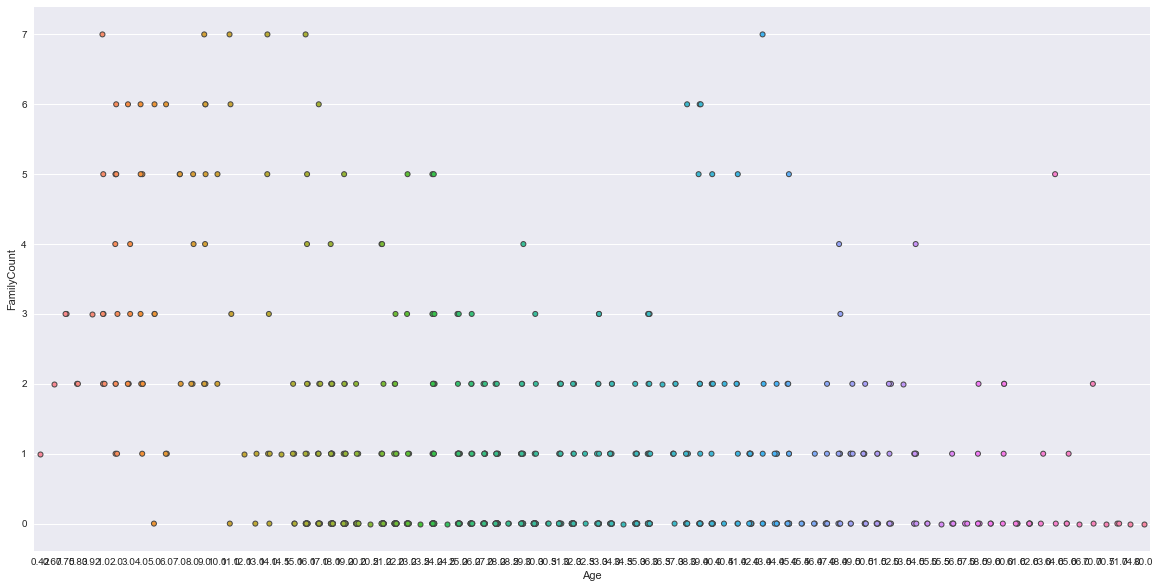

In [16]:
plt.rcParams['figure.figsize']=(20,10)
sns.stripplot(x="Age", y="FamilyCount", data=titanic_df, jitter=True, linewidth=1);
print(titanic_df['Age'].corr(titanic_df['FamilyCount']))


## Limitations  
During this project lack of the data was the main limitation. Since by having the following information we could have a better analysis:

- The RMS titanic ship plans
- Passengers health status



## Conclusions

We may say that people with higher socioeconomic status had a better chance for survival since 34 percent of high class passenger could not survive while 76 percent of lower class passengers died.  

We cannot clarify the reason behind it since we do not have enough information about their cabins and where they were located on the RMS ship. The reason could be higher class passengers had their cabin closer to the deck or lifeboats.  

In addition, we have showed in our sample that being with family affected passengers survival chance since 67% of passengers who were traveling alone could not survive while the same factor for people who were traveling with their family is around 48 percent.
